# **Question 1: What is Simple Linear Regression?**
Answer:-Simple Linear Regression is a statistical method used to understand and model the relationship between two variables:

One independent variable (X)

One dependent variable (Y)

Its main purpose is to predict the value of Y based on the value of X.

Simple Definition

Simple Linear Regression fits a straight line through the data to show how Y changes when X changes.

The equation is:

Y = a + bX

Where:

-  Y = predicted value

-  X = independent variable

-  a = intercept (value of Y when X = 0)

-  b = slope (how much Y changes when X increases by 1 unit)

# **Question 2: What are the key assumptions of Simple Linear Regression?**
Answer:-Simple Linear Regression works correctly only when certain assumptions are satisfied. These are:

**1. Linearity**

The relationship between the independent variable (X) and the dependent variable (Y) must be linear.
(Y should change in a straight-line pattern with X.)

**2. Independence of Errors**

The residuals (errors) must be independent of each other.
(No correlation between the errors of one observation and another.)

**3. Homoscedasticity**

The variance of residuals should be constant across all values of X.
(Errors should be spread evenly—no increasing or decreasing pattern.)

**4. Normality of Errors**

The residuals should be normally distributed.
(This helps in accurate hypothesis testing and confidence intervals.)

**5. No Perfect Multicollinearity**

For simple linear regression, this means:

-  X should not be a constant

-  X and Y should not have a perfect linear relationship

**6. No Significant Outliers**

There should be no extreme values that can distort the regression line.

# **Question 3: What is heteroscedasticity, and why is it important to address in regression models?**
Answer:-Heteroscedasticity occurs when the variance of the errors (residuals) in a regression model is not constant across all values of the independent variable.

In simple words:
-  The spread of errors keeps increasing or decreasing instead of staying the same.

Example:
When predicting income from education level, high-income individuals may have much more variation than low-income individuals. This creates heteroscedasticity.

**Why is it Important to Address?**

Heteroscedasticity is a problem because it:

**1. Makes the model’s estimates inefficient**

The regression line may still be correct on average, but the predictions become less reliable.

**2. Leads to incorrect standard errors**

Standard errors can become too big or too small, which affects:

-  t-tests

-  p-values

-  confidence intervals

This means statistical tests may become invalid.

**3. Can lead to wrong conclusions**

You might wrongly decide that a variable is significant or not significant.

**Bottom Line**

Heteroscedasticity does not bias the coefficients, but it makes the model’s statistical results unreliable.
So, identifying and fixing it is important for accurate regression analysis.

# **Question 4: What is Multiple Linear Regression?**
Answer:-Multiple Linear Regression is a statistical technique used to predict the value of one dependent variable using two or more independent variables.

Mathematical Equation

y=b0​+b1​x1​+b2​x2​+⋯+bn​xn​
Where:

y = dependent variable

-  𝑥
1,
𝑥
2,…
,
𝑥
𝑛
x
1
,x
2
,…,x
n
 = independent variables

-  𝑏
0
b
0
 = intercept

-  𝑏
1
,
𝑏
2,
…,
𝑏
𝑛
b
1
,b
2
,…b
n
 = coefficients

 Example

Predicting house price based on:

-  Area

-  Number of rooms

-  Location


# **Question 5: What is polynomial regression, and how does it differ from linear regression?**
Answer:-Polynomial Regression is a type of regression analysis in which the relationship between the independent variable (X) and dependent variable (Y) is modeled as an nth-degree polynomial.

It allows the model to capture curved (non-linear) relationships.

General equation:

𝑌
=
𝑎
0
+
𝑎
1
𝑋
+
𝑎
2
𝑋
2
+
𝑎
3
𝑋
3
+
…
+
𝑎
𝑛
𝑋
𝑛
Y=a
0
	​

+a
1
	​

X+a
2
	​

X
2
+a
3
	​

X
3
+…+a
n
	​

X
n

Example: If Y changes like a curve rather than a straight line, polynomial regression fits that curve.

#**Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:**

#**-  X = [1, 2, 3, 4, 5]**

#**-  Y = [2.1, 4.3, 6.1, 7.9, 10.2]**

Slope (m): 1.9800
Intercept (b): 0.1800
R-squared: 0.9979


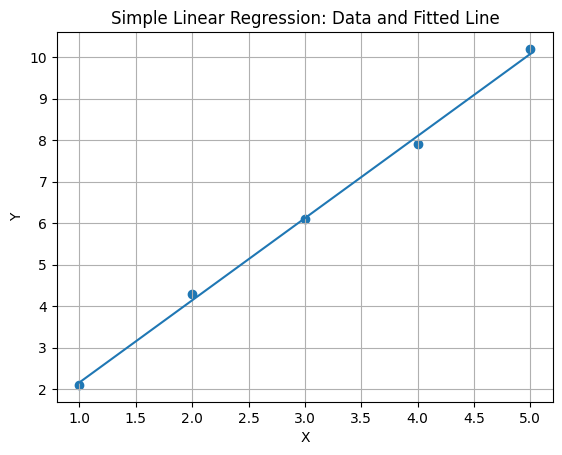

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit linear model (degree 1 polynomial)
m, b = np.polyfit(X, Y, 1)  # slope and intercept
y_pred = m * X + b

# Calculate R-squared
ss_res = np.sum((Y - y_pred) ** 2)
ss_tot = np.sum((Y - Y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot
plt.scatter(X, Y)
plt.plot(X, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression: Data and Fitted Line")
plt.grid(True)
plt.show()


#**Question 7: Fit a Multiple Linear Regression model on this sample data:**

#**-  Area = [1200, 1500, 1800, 2000]**

#**-  Rooms = [2, 3, 3, 4]**

#**-  Price = [250000, 300000, 320000, 370000]**



In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
df = pd.DataFrame({
    "Area": [1200,1500,1800,2000],
    "Rooms":[2,3,3,4],
    "Price":[250000,300000,320000,370000]
})

X = df[["Area","Rooms"]]
Xc = sm.add_constant(X)
y = df["Price"]

model = sm.OLS(y, Xc).fit()
print(model.params)
print(model.pvalues)
print("R2:", model.rsquared, "Adj R2:", model.rsquared_adj)

# VIF
vif = pd.DataFrame({
  "feature": Xc.columns,
  "VIF": [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
})
print(vif)


const    103157.894737
Area         63.157895
Rooms     34736.842105
dtype: float64
const    0.058391
Area     0.147363
Rooms    0.115659
dtype: float64
R2: 0.9985775248933144 Adj R2: 0.9957325746799432
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


#**Question 8: Implement polynomial regression on the following data:**

#**- X = [1, 2, 3, 4, 5]**

#**- Y = [2.2, 4.8, 7.5, 11.2, 14.7]**

#**Fit a 2nd-degree polynomial and plot the resulting curve.**

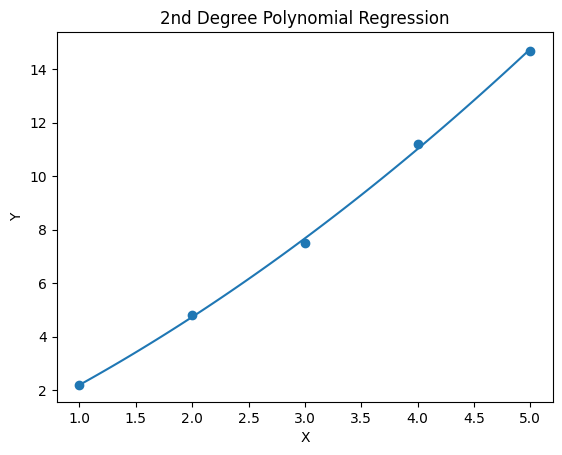

Polynomial Equation:
     2
0.2 x + 1.94 x + 0.06


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Fit 2nd degree polynomial
coefficients = np.polyfit(X, Y, 2)
polynomial = np.poly1d(coefficients)

# Generate smooth curve
X_new = np.linspace(1, 5, 100)
Y_new = polynomial(X_new)

# Plot
plt.scatter(X, Y)
plt.plot(X_new, Y_new)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()

# Print equation
print("Polynomial Equation:")
print(polynomial)


#**Question 9: Create a residuals plot for a regression model trained on this data:**

#**-  X = [10, 20, 30, 40, 50]**

#**-  Y = [15, 35, 40, 50, 65]**

#**Assess heteroscedasticity by examining the spread of residuals.**


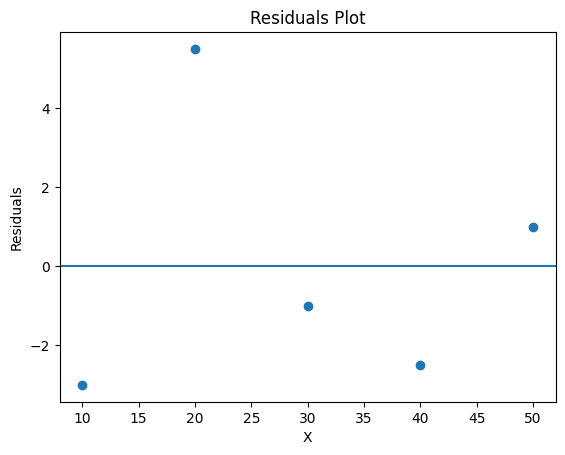

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Residual plot
plt.scatter(X, residuals)
plt.axhline(y=0)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Print residuals
print("Residuals:", residuals)


#**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.**

#**However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

Answer:-As a data scientist predicting house prices, if heteroscedasticity and multicollinearity are detected in the regression model, I would take the following steps to ensure a robust model:

#1. Detect and Confirm the Issues

-  Use residual plots and Breusch–Pagan test to confirm heteroscedasticity

-  Check correlation matrix and Variance Inflation Factor (VIF) to identify multicollinearity among features like area and number of rooms

#2. Handling Heteroscedasticity

-  Apply log or Box-Cox transformation on the target variable (house prices)

-  Use Weighted Least Squares (WLS) to give less weight to high-variance observations

-  Use robust standard errors to obtain reliable inference

#3. Handling Multicollinearity

-  Remove or combine highly correlated variables (e.g., area per room instead of area and rooms separately)

-  Use regularization techniques such as Ridge Regression or Lasso Regression

-  Apply Principal Component Analysis (PCA) to reduce feature dimensionality

#4. Model Validation

-  Re-train the model after corrections and re-check residual plots and VIF values

-  Use cross-validation to evaluate model stability and performance

#5. Final Outcome

-  These steps help improve model reliability, interpretability, and prediction accuracy, ensuring a robust house price prediction model.